In [1]:
import yfinance as yf

# Descargamos los datos de Tesla (símbolo TSLA)
tesla_data = yf.download("TSLA")

# Restablecemos el índice
tesla_data.reset_index(inplace=True)

# Mostramos las primeras cinco filas
print(tesla_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Paso 1: Descargar el HTML de la página de MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Paso 2: Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Paso 3: Buscar la tabla que contiene "Tesla Quarterly Revenue"
tesla_revenue = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        df_list = pd.read_html(str(table))
        if df_list:
            tesla_revenue = df_list[0]
            break

# Paso 4: Verificar y limpiar los datos
if tesla_revenue is not None:
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

    # Paso 5: Mostrar las últimas 5 filas
    tesla_revenue.tail()
else:
    print("No se encontró la tabla de ingresos.")



No se encontró la tabla de ingresos.


In [5]:
import yfinance as yf
import pandas as pd

# Descargamos los datos históricos de GameStop (símbolo GME)
gme_data = yf.download("GME")

# Restablecemos el índice para convertir la fecha en columna
gme_data.reset_index(inplace=True)

# Mostramos las primeras cinco filas
gme_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2002-02-13,1.691666,1.693350,1.603296,1.620128,76216000
1,2002-02-14,1.683251,1.716074,1.670626,1.712708,11021600
2,2002-02-15,1.674834,1.687458,1.658002,1.683250,8389600
3,2002-02-19,1.607504,1.666418,1.578047,1.666418,7410400
4,2002-02-20,1.662210,1.662210,1.603296,1.615921,6892800


In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

for i, table in enumerate(tables):
    print(f"\n--- Tabla {i} ---\n")
    print(table.text[:300])  # Mostrar solo los primeros 300 caracteres por tabla

# Esto puede cambiar dependiendo de lo que veas en el paso anterior
try:
    df_list = pd.read_html(str(tables[1])) # Cambia el índice si es necesario
    gme_revenue = df_list[0]

    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

    gme_revenue.tail()

except Exception as e:
    print("⚠️ Error al leer la tabla de ingresos:", e)



⚠️ Error al leer la tabla de ingresos: list index out of range


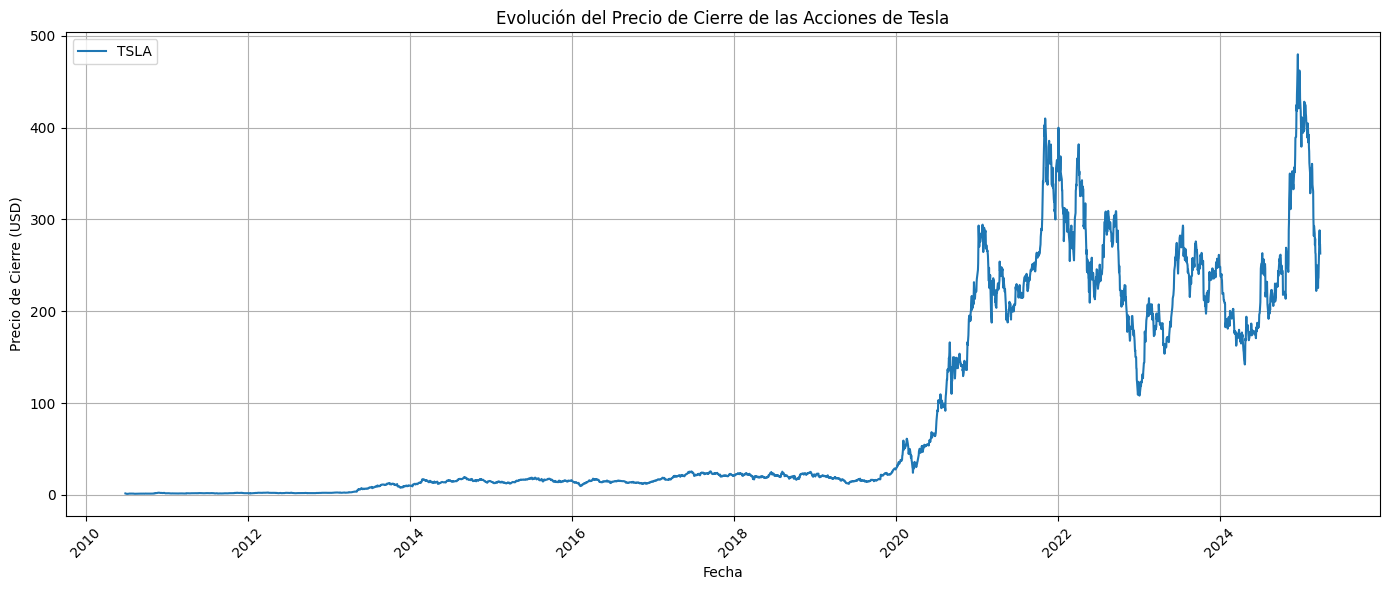

In [14]:
import matplotlib.pyplot as plt

# Definimos la función make_graph
def make_graph(data, stock, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label=stock)
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Llamamos a la función con los datos de Tesla
make_graph(tesla_data, 'TSLA', 'Evolución del Precio de Cierre de las Acciones de Tesla')


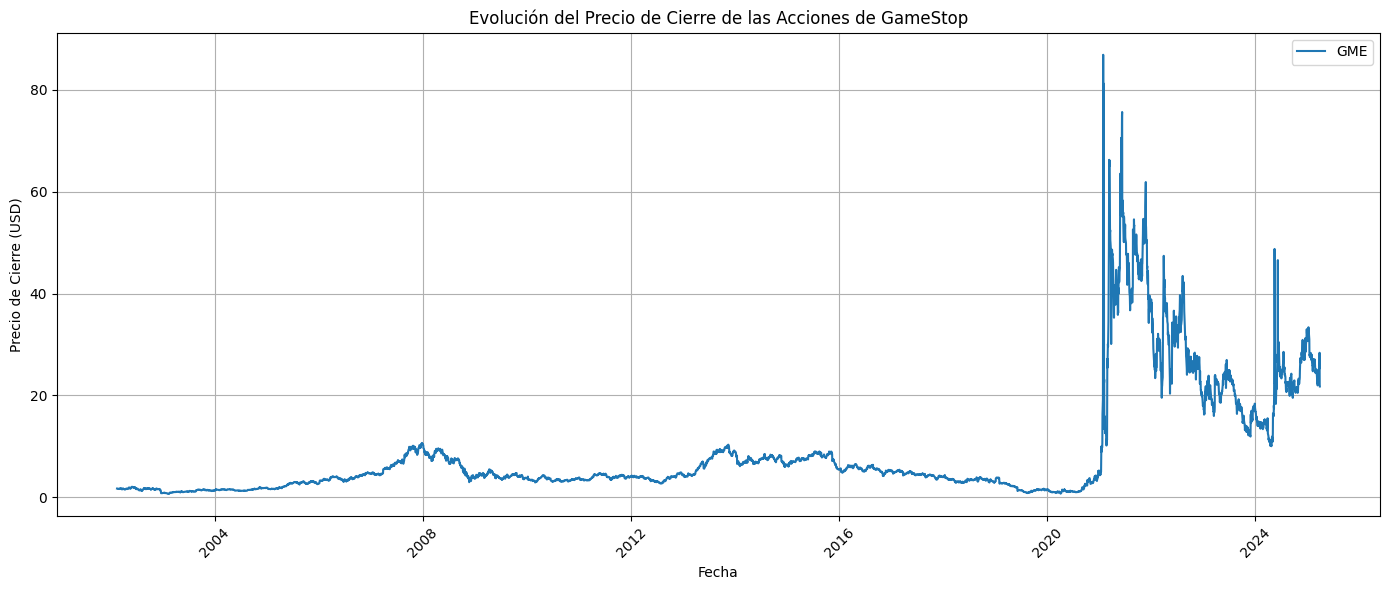

In [15]:
# Usamos la misma función make_graph definida anteriormente
make_graph(gme_data, 'GME', 'Evolución del Precio de Cierre de las Acciones de GameStop')
